In [ ]:
# import pandas as pd

# df=pd.read_csv('adult.tsv',sep='\t')

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/math627/adult.tsv', sep='\t')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/math627/adult.tsv'

In [ ]:
len(df)

In [ ]:
df = df.dropna()

In [ ]:
df=df.drop('fnlwgt',axis=1)
Z1=df['race']
Z2=df['gender']
Y=df['income']
X=df.drop(['income','race','gender'], axis=1)

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [ ]:
X_encoded = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country'])

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load data and preprocess
df = pd.read_csv('adult.tsv', sep='\t')[0:5000]
df = df.dropna()
df = df.drop('fnlwgt', axis=1)
X = df.drop(['income', 'race', 'gender'], axis=1)
Y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Encode gender labels
Z = LabelEncoder().fit_transform(df['gender'].str.strip())

len(Z[Z[:]==1])


In [ ]:
# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(
    X_encoded, Y, Z, test_size=0.2, random_state=10)

# Define parameter grid for income prediction
# param_grid_income = {
#     'max_depth': [3, 4, 5, 6],
#     'min_child_weight': [1, 5, 10],
#     'gamma': [0.5, 1, 1.5, 2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
# }

param_grid_income = {
    'max_depth': [3, 4],
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
}

In [ ]:

# Train the first XGB model to predict income using a grid search
xgb_income = XGBClassifier(learning_rate=0.1, n_estimators=100, objective='binary:logistic', Verbose=0, nthread=1)
clf_income = GridSearchCV(xgb_income, param_grid_income, scoring='roc_auc', n_jobs=-1, cv=5)
clf_income.fit(X_train, Y_train)

NameError: name 'XGBClassifier' is not defined

In [ ]:
print("Best parameters found: ", clf_income.best_params_)
print("Best AUC found: ", clf_income.best_score_)

NameError: name 'clf_income' is not defined

In [ ]:
best_xgb_model = clf_income.best_estimator_

In [ ]:
Y_pred = best_xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the best model: {accuracy:.4f}")

Accuracy of the best model: 1.0000


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(Y_test, Y_pred))
roc_auc = roc_auc_score(Y_test, Y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:



# Predict income categories on training data for further use in gender prediction
X_train['predicted_income'] = clf_income.predict(X_train)
X_test['predicted_income'] = clf_income.predict(X_test)

In [ ]:
# Define parameter grid for gender prediction
param_grid_gender = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
}

# Train the second XGB model to predict gender using a grid search
xgb_gender = XGBClassifier(learning_rate=0.1, n_estimators=100, objective='binary:logistic', silent=True, nthread=1)
clf_gender = GridSearchCV(xgb_gender, param_grid_gender, scoring='roc_auc', n_jobs=-1, cv=5)
clf_gender.fit(X_train[['predicted_income']], Z_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:55:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, nthread=1,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9], 'gamma': [0.5, 1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5],
                         'subsample': [0.7, 0.9]},
             scoring='roc_auc')

In [ ]:

# Output best parameters and AUC score for gender prediction
print("Best parameters found for gender prediction: ", clf_gender.best_params_)
print("Best AUC found for gender prediction: ", clf_gender.best_score_)

# Predict gender using the model
Z_pred = clf_gender.predict(X_test[['predicted_income']])






# Evaluate the gender prediction model
accuracy = accuracy_score(Z_test, Z_pred)
print(f"Accuracy of gender prediction: {accuracy:.4f}")
print(classification_report(Z_test, Z_pred))

Best parameters found for gender prediction:  {'colsample_bytree': 0.7, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7}
Best AUC found for gender prediction:  0.5
Accuracy of gender prediction: 0.7020
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       298
           1       0.70      1.00      0.82       702

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[1000]]


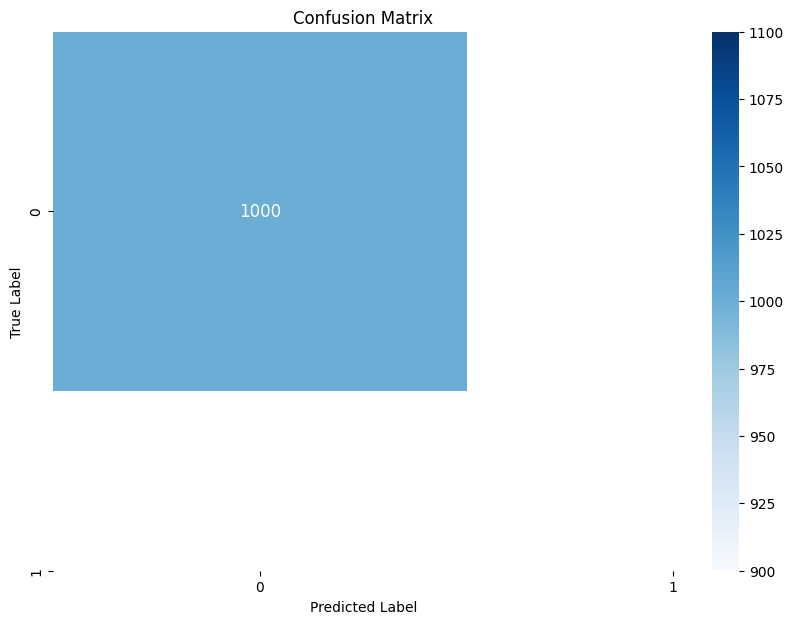

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

